In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

Number of coins touching the boundary = 12 



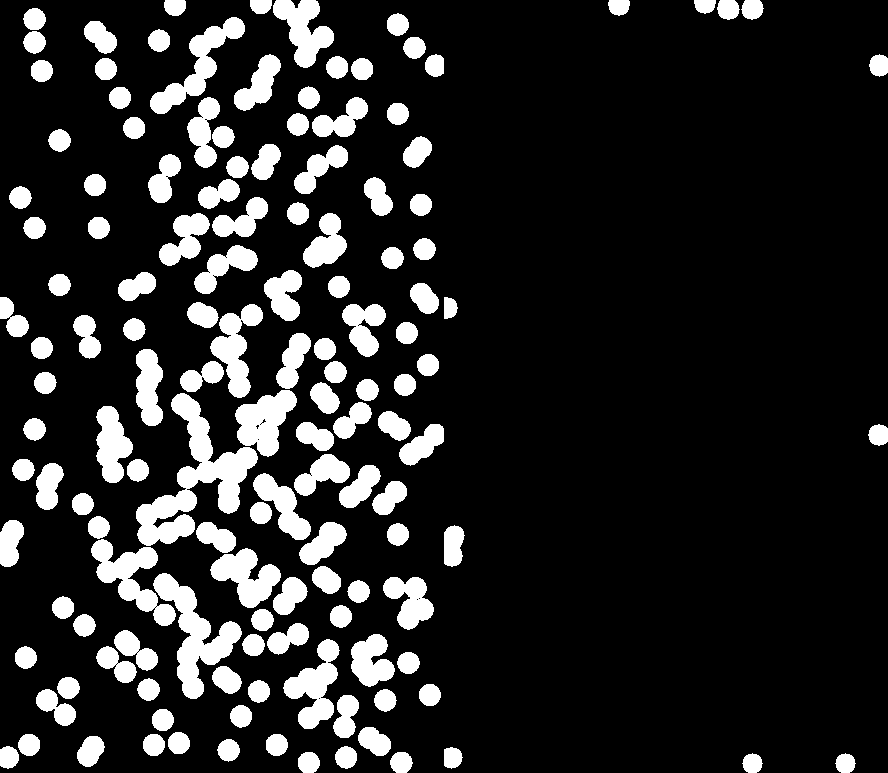

In [0]:
# HW: Write a script which reads 'coin.jpg' as input and outputs a new image containing:
# Also count the number of coins in each case.

# only the coins touching the boundary of the image
# only the coins which overlap with each other. 
# only non-overlapping coins.

#Boundary coins

I = cv2.imread('/content/drive/My Drive/Copy of coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)

kernel = morp.disk(10,dtype='uint8')
erosion = cv2.erode(I,kernel,iterations = 1)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0


for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255 and i>10 and i< len(erosion)-10 and j>10 and j<len(erosion[i])-10:
      erosion[i][j]=0
    elif erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins touching the boundary =",count,"\n")
    
    
# kernel = np.ones((1,1),np.uint8)
erosion = cv2.dilate(erosion,kernel,iterations = 1)

cv2_imshow(np.hstack([I,erosion]))


Number of coins non-overlapping = 62 

Number of coins overlapping = 207 



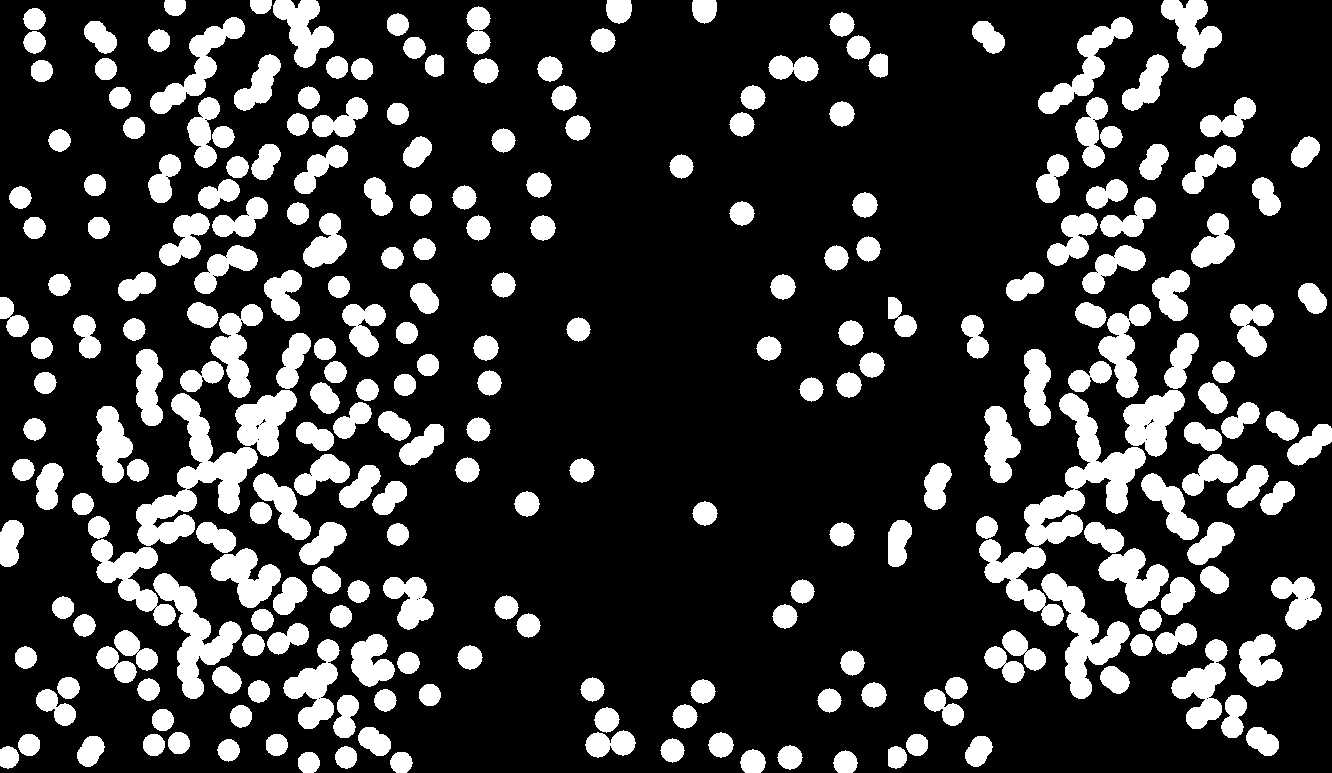

In [0]:
#Overlapping and non-overlapping coins
#Overlapping image is found by subtracting non-overlapping image from original image

I = cv2.imread('/content/drive/My Drive/Copy of coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)


kernel = morp.disk(12,dtype='int')
for i in range(len(kernel)):
  for j in range(len(kernel[i])):
    if(i==0 or i==len(kernel)-1 or j==0 or j==len(kernel)-1):
      kernel[i][j]=-1
    if(kernel[i][j]==1 and( i!=12 or j!=12)):
      kernel[i][j]=0






output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)

kernel = morp.disk(12,np.uint8)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0


for i in range(len(output_image)):
  for j in range(len(output_image[i])):
    if output_image[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(output_image),i+11)):
          for l in range(max(0,j-11),min(len(output_image[i]),j+11)):
            flag[k][l]=1
print("Number of coins non-overlapping =",count,"\n")



dilation = cv2.dilate(output_image,kernel,iterations = 1)
I2=I-dilation



erosion = cv2.erode(I2,morp.disk(10,np.uint8),iterations = 1)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins overlapping =",count,"\n")


cv2_imshow(np.hstack([I,dilation,I2]))

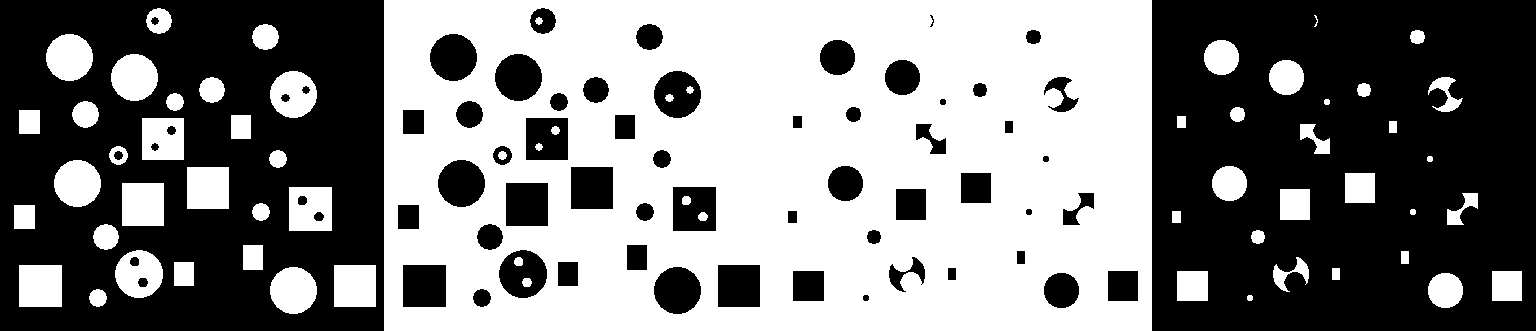

In [189]:
# HW: Read the image 'objects.png' and try to answer the following questions using code.
# Identify means plot the following objects.

# How many objects have one or more holes?
# How many square objects are in the image?
# Identify the square objects that have holes.
# Identify the circular objects that have no holes


I = cv2.imread('/content/drive/My Drive/Copy of objects.png', cv2.IMREAD_GRAYSCALE)
# ret,Img = cv2.threshold(I,127,255,cv2.THRESH_BINARY)

I1=255-Img
# I1=I
# I2 = cv2.erode(I1,morp.square(10,np.uint8),iterations = 2)

I2 = cv2.dilate(I1,morp.disk(3,np.uint8),iterations = 2)

I3=255-I2
# I2 = cv2.erode(I1,morp.disk(5,np.uint8),iterations = 1)




###
# kernel=np.array([[-1,-1,-1,-1,-1],
#                  [-1, 0, 0, 0, -1],
#                  [-1, 0, 1, 0, -1],
#                  [-1, 0, 0, 0, -1],
#                  [-1,-1,-1,-1,-1]])

# output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)
###




# kernel = morp.disk(12,dtype='int')
# for i in range(len(kernel)):
#   for j in range(len(kernel[i])):
#     if(i==0 or i==len(kernel)-1 or j==0 or j==len(kernel)-1):
#       kernel[i][j]=-1
#     if(kernel[i][j]==1 and( i!=12 or j!=12)):
#       kernel[i][j]=0


# components=0
# f=0
# for i in range(len(I)):
#   for j in range(len(I[i])):
#     if(I[i][j]==0):
#       f=1
    



# output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)

# kernel = morp.disk(12,np.uint8)

# dilation = cv2.dilate(output_image,kernel,iterations = 1)
# I2=I-dilation

cv2_imshow(np.hstack([I,I1,I2,I3]))

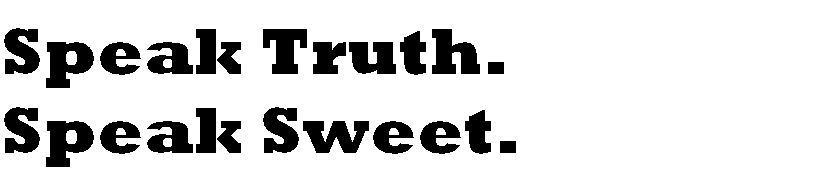

no of comps=  10



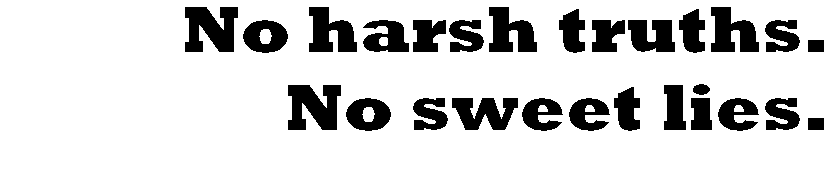

no of comps=  8



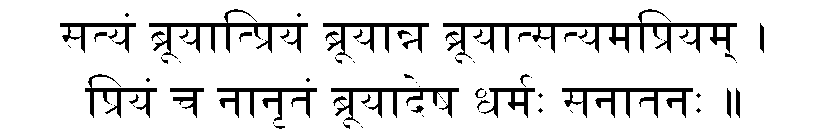

no of comps=  8



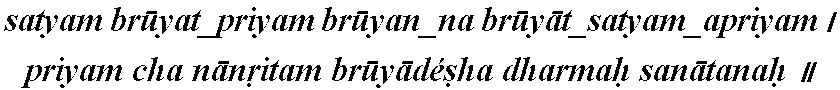

no of comps=  23



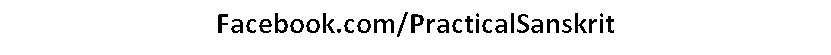

no of comps=  12


In [188]:
#HW: Write a script which takes the image 'text2.png' as input and outputs the number of components for each of the five colors. 
#Note that the components may be non-letters (e.g. . and |) Use thresholding and connected components to solve this. 
#You can crop image for each colour manually.

I = cv2.imread('/content/drive/My Drive/Copy of text2.png',cv2.IMREAD_GRAYSCALE)
_, I = cv2.threshold(I,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
connectivity = 4  # You need to choose 4 or 8 for connectivity type
# output = cv2.connectedComponents(I, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
# print(output)


I1=I[20:200:,20:851:]


I2=I[200:380:,20:851:]

I3=I[380:515:,20:851:]

I4=I[515:605:,16:856:]

I5=I[605:660:,20:851:]

# cv2_imshow(np.hstack([I]))

cv2_imshow(I1)
output = cv2.connectedComponents(I1, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
print("no of comps= ",output[0])
print()

cv2_imshow(I2)

output = cv2.connectedComponents(I2, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
print("no of comps= ",output[0])
print()
cv2_imshow(I3)
output = cv2.connectedComponents(I3, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
print("no of comps= ",output[0])
print()
cv2_imshow(I4)
output = cv2.connectedComponents(I4, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
print("no of comps= ",output[0])
print()
cv2_imshow(I5)
output = cv2.connectedComponents(I5, connectivity=4)
# output = cv2.connectedComponentsWithStats(I, 4, cv2.CV_32S)
print("no of comps= ",output[0])




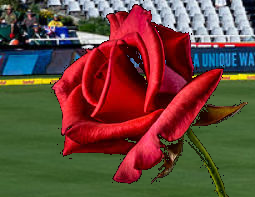

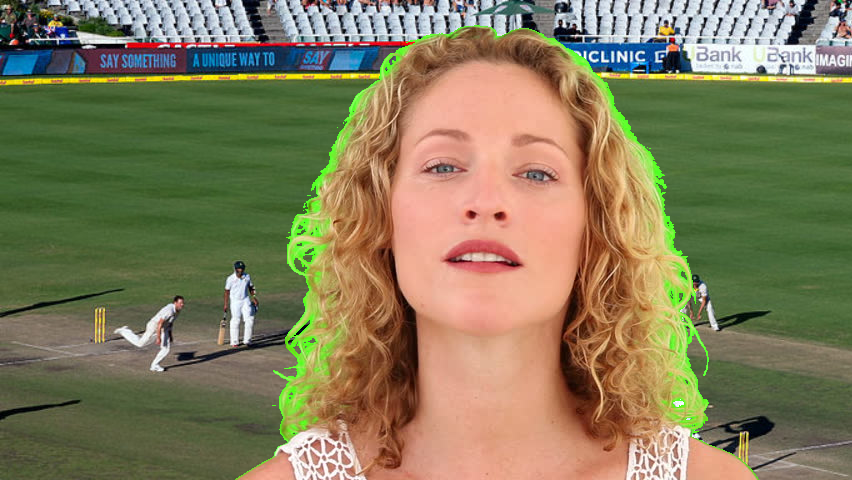

In [137]:
#HW: Chroma Keying: Perform chroma Keying on the images rose.jpeg and chroma_img.jpg on a suitable background. Experiment with different backgrounds and show some interesting results.

I = cv2.imread('/content/drive/My Drive/Copy of rose.jpeg')
I2 = cv2.imread('/content/drive/My Drive/Copy of chroma_img.jpg')
I1 = cv2.imread('/content/drive/My Drive/Copy of stadium.jpg')

# l=[]
# for i in range(256):
#   l.append(0)

for i in range(len(I)):
  for j in range(len(I[i])):
    if(I[i][j][0]<=20 and I[i][j][1]<=20 and I[i][j][2]<=20):
      I[i][j][0]=I1[i][j][0]
      I[i][j][1]=I1[i][j][1]
      I[i][j][2]=I1[i][j][2]

for i in range(len(I2)):
  for j in range(len(I2[i])):
    if(I2[i][j][0]<=75 and I2[i][j][1]>=200 and I2[i][j][2]<=75):
      I2[i][j][0]=I1[i][j][0]
      I2[i][j][1]=I1[i][j][1]
      I2[i][j][2]=I1[i][j][2]


cv2_imshow(I)
cv2_imshow(I2)

46.73570458892839


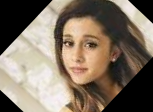

In [0]:
#HW: Face Alignment: Read the image 'face.jpg' and rotate the image such that eyes are aligned with respect to the x axis. Then show only the face by taking coordinates from the user and scale to the same size.


import math
I = cv2.imread('/content/drive/My Drive/Copy of tilted_face.jpg')

p2=[78,42]
p1=[95,58]
a,b,c=I.shape
myradians = math.degrees(math.atan2(p1[0]-p2[0],p1[1]-p2[1]))
print(myradians)

M=cv2.getRotationMatrix2D((b/2,a/2),myradians,1)
im_scaling=cv2.warpAffine(I,M,(I.shape[1],I.shape[0]))


# M=cv.getAffineTransform(pts1,pts2)
# ariana grange left eye (341, 325), right eye(423, 331)



cv2_imshow(im_scaling)

(179, 320, 3) (720, 1280, 3)


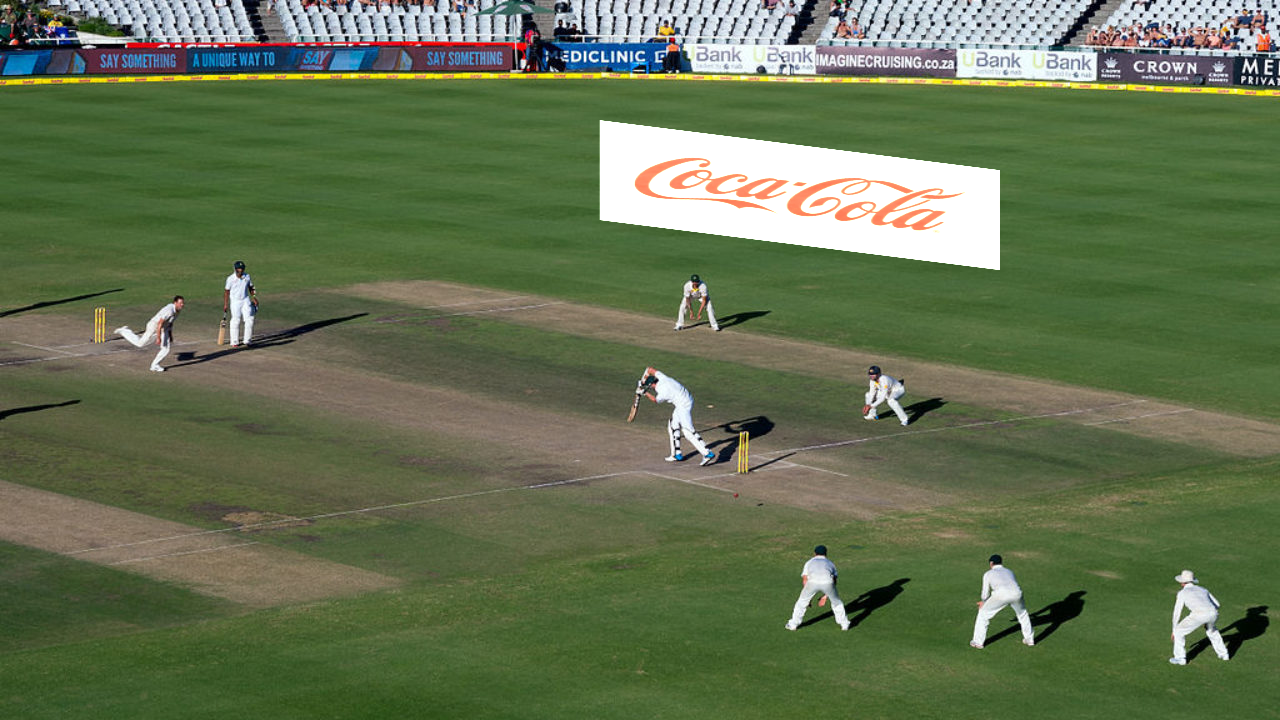

In [0]:

# HW: Perspective Transformation: Put the banner of coco-cola on the field. Experiment with these functions and show some interesting results.

img=cv2.imread('/content/drive/My Drive/Copy of coca.jpg')
background=cv2.imread('/content/drive/My Drive/Copy of stadium.jpg')
# overlaid=cv2.imread('/content/drive/My Drive/Copy of overlaid.jpg')

print(img.shape,background.shape)


pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords
H,status=cv2.findHomography(pts1,pts2)
im_dst=cv2.warpPerspective(img,H,(background.shape[1],background.shape[0]))
final=cv2.add(background,im_dst)
cv2_imshow(final)
# for i in range(len(img)):
# a1,b1,c1=img.shape
# a2,b2,c2=background.shape
# background[0:a1,0:b1,0:c1]=img
# cv2_imshow(background)

# newim=cv2.add(img,background)

# cv2_imshow(newim)